# Laboratory practice № 11 ($H_2$ & $H_{\infin}$)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 8

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
import scipy
import cvxpy as cp

In [86]:
import sympy
omega_i = sympy.Symbol("omega",real=True) * sympy.I

def get_fraction(num, den):
    den_ = sum(co*omega_i**i for i, co in enumerate(reversed(den)))
    num_ = sum(co*omega_i**i for i, co in enumerate(reversed(num)))
    return num_/den_

## Task 1

$x = \begin{bmatrix}a \\ v\end{bmatrix}$

$\dot{x} = \begin{bmatrix}0 & 1 \\ 0 & 0\end{bmatrix}x + \begin{bmatrix}0 \\ \frac{1}{M}\end{bmatrix}u + \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0\end{bmatrix}\begin{bmatrix}f_1 \\ f_2 \\ \xi\end{bmatrix}$

$y = \begin{bmatrix}1 &  0\end{bmatrix}x + \begin{bmatrix}0 & 0 & 1\end{bmatrix}\begin{bmatrix}f_1 \\ f_2 \\ \xi\end{bmatrix}$

$z = \begin{bmatrix}2 & 0 \\ 0 & 0\end{bmatrix}x + \begin{bmatrix}0 \\ 1 \end{bmatrix}u$

### Subtask 1

In [2]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [3]:
def generate_LQR(a,b,q,r):
    k, p, _ = ctrl.lqr(a,b,q,r)
    return k, p

In [4]:
K_1, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
K_1

array([[2., 2.]])

In [5]:
np.linalg.eigvals(A-B_2@K_1)

array([-1.+1.j, -1.-1.j])

In [6]:
sys_for_an = ctrl.ss(A-B_2@K_1,B_1,C_2-D_2@K_1,np.zeros((2,3)))
sys_for_an_tf = ctrl.ss2tf(sys_for_an)
sys_for_an_tf

TransferFunction([[array([2., 4.]), array([2.]), array([0.])], [array([-2.,  0.]), array([-2., -2.]), array([0.])]], [[array([1., 2., 2.]), array([1., 2., 2.]), array([1.])], [array([1., 2., 2.]), array([1., 2., 2.]), array([1.])]])

In [7]:
time_1 = np.linspace(0,30,int(30/0.005))
w = np.vstack([
    np.sin(time_1),
    np.cos(time_1*2),
    np.ones_like(time_1)
])
z = ctrl.forced_response(sys_for_an,time_1,X0=np.ones((2,1))*10,U=w)

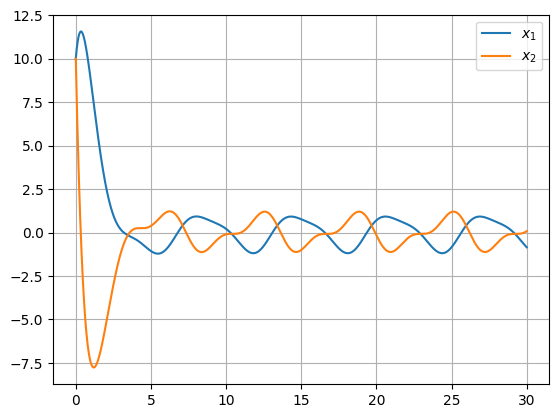

In [8]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
plt.grid()
plt.legend()

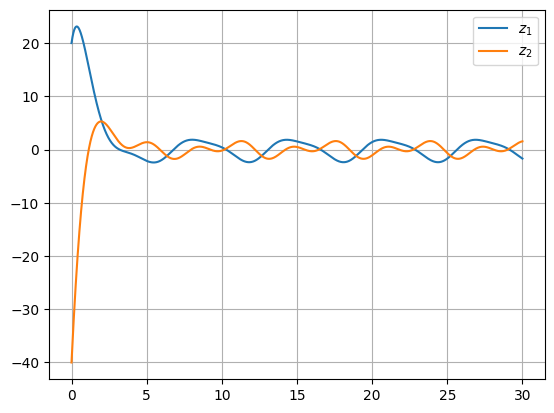

In [9]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
plt.grid()
plt.legend()

In [10]:
g_o = ctrl.gram(sys_for_an,"o")
g_o

array([[4., 2.],
       [2., 2.]])

h_2 norm

In [11]:
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.449489742783178

mfc

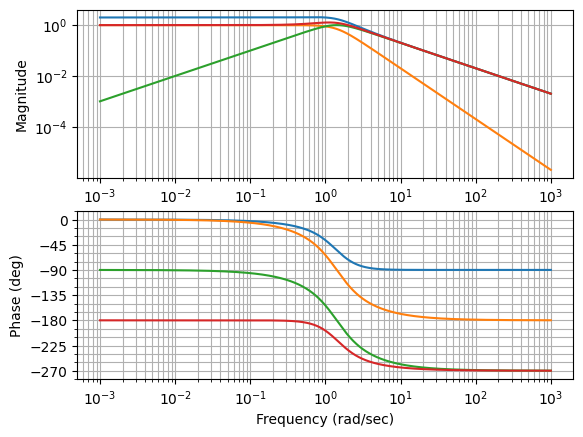

In [12]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [13]:
sys_for_an_tf

TransferFunction([[array([2., 4.]), array([2.]), array([0.])], [array([-2.,  0.]), array([-2., -2.]), array([0.])]], [[array([1., 2., 2.]), array([1., 2., 2.]), array([1.])], [array([1., 2., 2.]), array([1., 2., 2.]), array([1.])]])

svd

In [14]:

mat_1 = sympy.Matrix([
    [(2*omega_i+4)/(omega_i**2+2*omega_i+2), 2/(omega_i**2+2*omega_i+2), 0],
    [-2*omega_i/(omega_i**2+2*omega_i+2), (-2*omega_i-2)/(omega_i**2+2*omega_i+2), 0]
])
sing = sympy.Matrix(sympy.Abs(mat_1).singular_values()).T
sing.simplify()
sing

Matrix([[sqrt(2)*sqrt(3*(omega**2 + 2)*(omega**8 + 8*omega**4 + 16) + (omega**4 + 4)*sqrt(-4*(omega**8 + 8*omega**4 + 16)*(omega**4 + 6*omega**2 - 2*sqrt(omega**4 + 5*omega**2 + 4)*Abs(omega) + 4) + 9*(omega**6 + 2*omega**4 + 4*omega**2 + 8)**2))/sqrt(omega**12 + 12*omega**8 + 48*omega**4 + 64), sqrt(2)*sqrt(3*(omega**2 + 2)*(omega**8 + 8*omega**4 + 16) - (omega**4 + 4)*sqrt(-4*(omega**8 + 8*omega**4 + 16)*(omega**4 + 6*omega**2 - 2*sqrt(omega**4 + 5*omega**2 + 4)*Abs(omega) + 4) + 9*(omega**6 + 2*omega**4 + 4*omega**2 + 8)**2))/sqrt(omega**12 + 12*omega**8 + 48*omega**4 + 64), 0]])

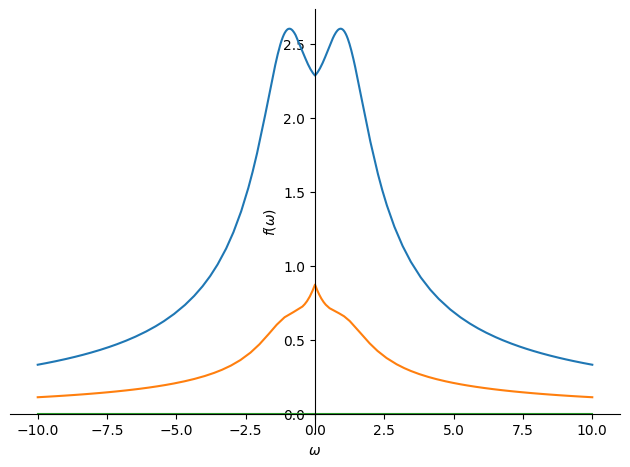

In [15]:
import sympy.plotting


p = sympy.plotting.plot(sing[0],show=False)
p.append(sympy.plotting.plot(sing[1],show=False)[0])
p.append(sympy.plotting.plot(sing[2],show=False)[0])
p.show()

### Subtask 2

In [16]:
C_2 = np.array([
    [2, 0],
    [0, 1]
])

D_2 = np.array([
    [2],
    [0]
])

In [17]:
import scipy.linalg


def generate_H2(a,b_2,c_2,d_2):
    q = scipy.linalg.solve_continuous_are(a,b_2,c_2.T@c_2,d_2.T@d_2)
    return -np.linalg.inv(d_2.T@d_2)@b_2.T@q

In [18]:
K_2 = generate_H2(A,B_2,C_2,D_2)
K_2

array([[-1. , -1.5]])

In [19]:
np.linalg.eigvals(A+B_2@K_2)

array([-0.75+0.66143783j, -0.75-0.66143783j])

In [20]:
sys_for_an_1 = ctrl.ss(A+B_2@K_2,B_1,C_2+D_2@K_2,np.zeros((2,3)))
sys_for_an_tf = ctrl.ss2tf(sys_for_an_1)
sys_for_an_tf

TransferFunction([[array([-2.66453526e-15,  3.00000000e+00]), array([-3.00000000e+00, -2.66453526e-15]), array([0.])], [array([-1.]), array([1., 0.]), array([0.])]], [[array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])], [array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])]])

In [21]:
z = ctrl.forced_response(sys_for_an_1,time_1,X0=np.ones((2,1))*10,U=w)

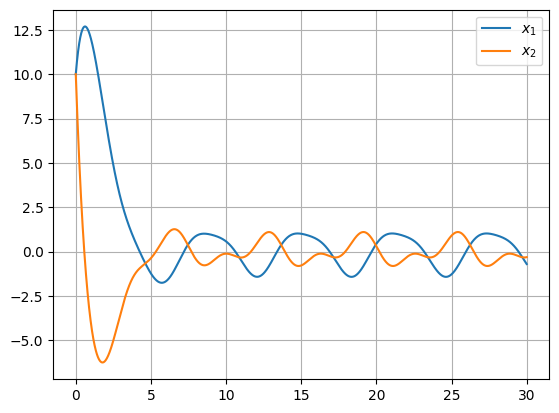

In [22]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
plt.grid()
plt.legend()

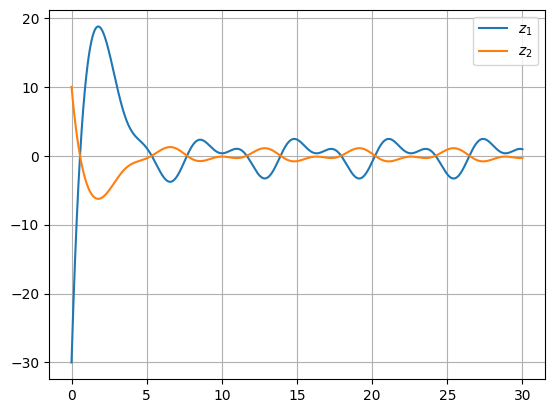

In [23]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
plt.grid()
plt.legend()

In [24]:
g_o = ctrl.gram(sys_for_an_1,"o")
g_o

array([[3.33333333e+00, 8.32090887e-17],
       [8.32090887e-17, 3.33333333e+00]])

H_2 norm

In [25]:
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.5819888974716103

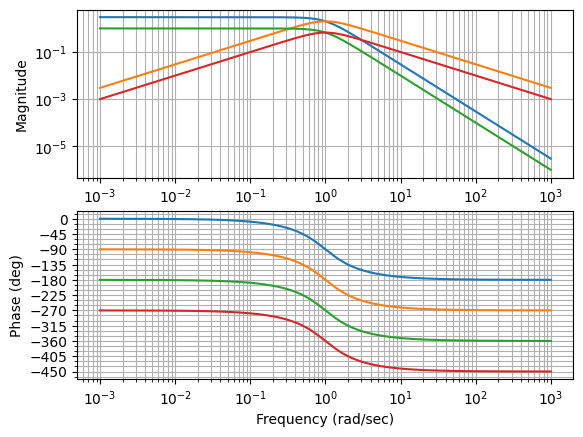

In [26]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [27]:
sys_for_an_tf

TransferFunction([[array([-2.66453526e-15,  3.00000000e+00]), array([-3.00000000e+00, -2.66453526e-15]), array([0.])], [array([-1.]), array([1., 0.]), array([0.])]], [[array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])], [array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])]])

In [28]:
mat_2 = sympy.Matrix([
    [3/(omega_i**2+1.5*omega_i+1), (-3*omega_i)/(omega_i**2+1.5*omega_i+1), 0],
    [-1/(omega_i**2+1.5*omega_i+1), omega_i/(omega_i**2+1.5*omega_i+1), 0]
])
sing = sympy.Matrix(sympy.Abs(mat_2).singular_values()).T
sing.simplify()
sing

Matrix([[3.16227766016838*sqrt(omega**2 + 1)/sqrt(1.0*omega**4 + 0.25*omega**2 + 1.0), 0, 0]])

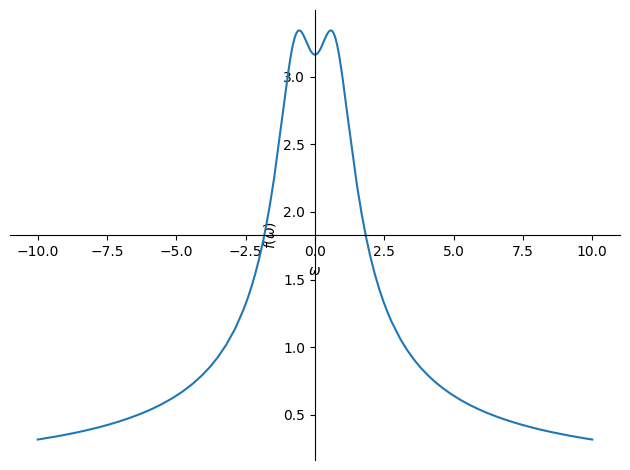

In [29]:
p = sympy.plotting.plot(sing[0])

## Task 2

In [30]:
def generate_H2_obs(a,b_1,c_1,d_1):
    p = scipy.linalg.solve_continuous_are(a.T,c_1.T,b_1@b_1.T,d_1@d_1.T)
    return -p@ c_1.T @np.linalg.inv(d_1@d_1.T)

In [31]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [32]:
K_3, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
L_3 = generate_H2_obs(A,B_1,C_1,D_1)

In [33]:
K_3 = -K_3
K_3

array([[-2., -2.]])

In [34]:
L_3 

array([[-1.73205081],
       [-1.        ]])

In [35]:
A_new = np.block([
    [A + B_2@K_3, -B_2@K_3],
    [np.zeros_like(A), A + L_3@C_1]
]) 
B_new = np.block([
    [B_1],
    [L_3@D_1+B_1]
]) 
C_new = np.block([
    [C_1, np.zeros_like(C_1)],
    [C_1, -C_1],
    [C_2+D_2@K_3, -D_2@K_3],
    [C_2+D_2@K_3, -C_2-D_2@K_3]
]) 
D_new = np.block([
    [D_1],
    [np.zeros_like(D_1)],
    [np.zeros((C_2.shape[0],D_1.shape[1]))],
    [np.zeros((C_2.shape[0],D_1.shape[1]))]
]) 

In [36]:
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [37]:
w = np.vstack([
    np.sin(time_1),
    np.cos(time_1*2),
    0.5*np.sin(time_1)
])

In [38]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

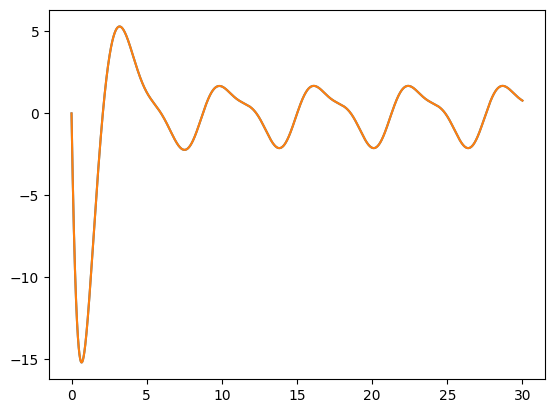

In [39]:
plt.plot(time_1,out.outputs[3])
plt.plot(time_1,out.outputs[5])

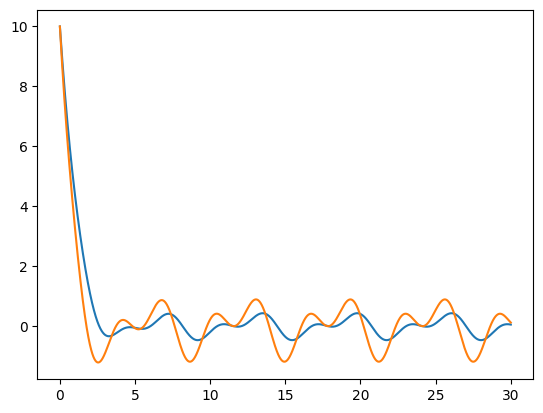

In [40]:
plt.plot(time_1,out.states[2])
plt.plot(time_1,out.states[3])


## Task 3

In [157]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 2]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [158]:
C_2.T@D_2

array([[0],
       [0]])

In [159]:
def generate_Hinf(a,b_2,c_2,d_2,b_1,gamma):
    R = b_2@np.linalg.inv(d_2.T@d_2)@b_2.T-(gamma**-2)*b_1@b_1.T
    q = scipy.linalg.solve_continuous_are(a,np.identity(R.shape[0]),c_2.T@c_2,np.linalg.inv(R))
    return -np.linalg.inv(d_2.T@d_2)@b_2.T@q

In [200]:
K_1 = generate_Hinf(A,B_2,C_2,D_2,B_1,1.65)

In [201]:
np.linalg.eigvals(A+B_2@K_1)

array([ -1.27583352, -25.7831278 ])

In [202]:
sys_for_an_3 = ctrl.ss(A+B_2@K_1,B_1,C_2+D_2@K_1,np.zeros((2,3)))
sys_for_an_tf = ctrl.ss2tf(sys_for_an_3)
sys_for_an_tf

TransferFunction([[array([ 2.        , 54.11792264]), array([2.]), array([0.])], [array([-3.28949786e+01,  1.56319402e-13]), array([-27.05896132, -32.8949786 ]), array([0.])]], [[array([ 1.        , 27.05896132, 32.8949786 ]), array([ 1.        , 27.05896132, 32.8949786 ]), array([1.])], [array([ 1.        , 27.05896132, 32.8949786 ]), array([ 1.        , 27.05896132, 32.8949786 ]), array([1.])]])

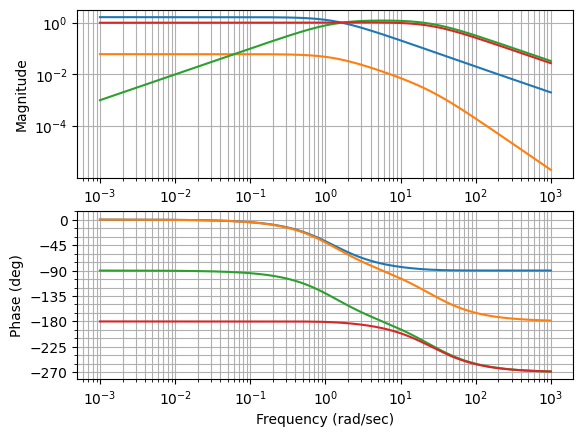

In [203]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [204]:
mat_ = sympy.Matrix([
    [get_fraction(sys_for_an_tf[0,0].num[0][0],sys_for_an_tf[0,0].den[0][0]), get_fraction(sys_for_an_tf[0,1].num[0][0],sys_for_an_tf[0,1].den[0][0]), 0],
    [get_fraction(sys_for_an_tf[1,0].num[0][0],sys_for_an_tf[1,0].den[0][0]), get_fraction(sys_for_an_tf[1,1].num[0][0],sys_for_an_tf[1,1].den[0][0]), 0]
])
sing = sympy.Matrix(sympy.Abs(mat_).singular_values()).T
sing.simplify()
sing

Matrix([[6.62170552083513e-14*sqrt(0.90104805470643*sqrt(-(6.93389840571281e-7*omega**8 + 0.000924146416214455*omega**6 + 0.309425004622095*omega**4 + omega**2 + 0.811887596890242)**2*(4.0*omega**16 + 10662.3588883628*omega**14 + 10675366.1236434*omega**12 + 4769611919.30546*omega**10 + 811941676031.586*omega**8 + 5161099838316.78*omega**6 + 12499746666186.4*omega**4 + 13509240877325.9*omega**2 + 5483992555851.76)*(0.00250128859207331*omega**20 + 8.50621429449754*omega**18 - 0.200051537042765*omega**16*sqrt(0.000924146416214458*omega**6 + 0.67801412094466*omega**4 + 1.0*omega**2 + 2.25822157805195e-29) + 11579.7495281322*omega**16 - 533.255321029641*omega**14*sqrt(0.000924146416214458*omega**6 + 0.67801412094466*omega**4 + 1.0*omega**2 + 2.25822157805195e-29) + 7897238.1403037*omega**14 - 533905.850382284*omega**12*sqrt(0.000924146416214458*omega**6 + 0.67801412094466*omega**4 + 1.0*omega**2 + 2.25822157805195e-29) + 2707545299.90047*omega**12 - 238542048.888638*omega**10*sqrt(0.000924

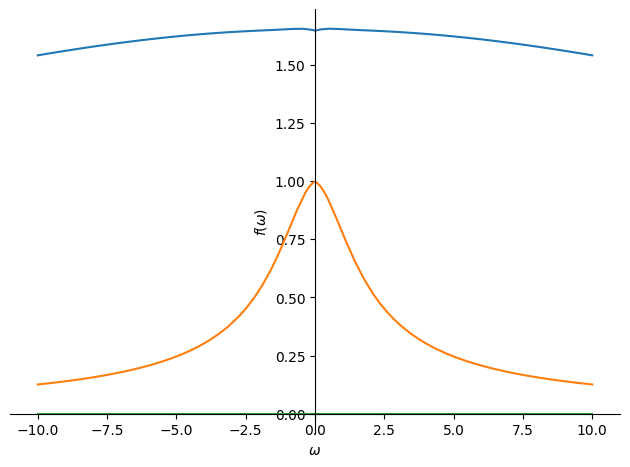

In [205]:
p = sympy.plotting.plot(sing[0],show=False)
p.append(sympy.plotting.plot(sing[1],show=False)[0])
p.append(sympy.plotting.plot(sing[2],show=False)[0])
p.show()

In [206]:
z = ctrl.forced_response(sys_for_an_3,time_1,X0=np.ones((2,1))*10,U=w)

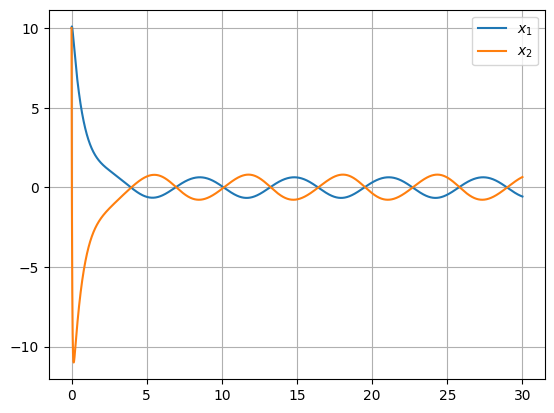

In [207]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
plt.grid()
plt.legend()

## Task 4

In [261]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 2]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [267]:
def generate_Hinf_obs(a,b_1,b_2,c_1,c_2,d_1,d_2,gamma):
    R_1 = c_1.T@np.linalg.inv(d_1@d_1.T)@c_1-(gamma**-2)*c_2.T@c_2
    R_2 = b_2@np.linalg.inv(d_2.T@d_2)@b_2.T-(gamma**-2)*b_1@b_1.T
    p = scipy.linalg.solve_continuous_are(a.T,np.identity(R_1.shape[0]),b_1@b_1.T,np.linalg.inv(R_1))
    q = scipy.linalg.solve_continuous_are(a,np.identity(R_2.shape[0]),c_2.T@c_2,np.linalg.inv(R_2))
    if np.max(np.linalg.eig(p@q)[0]) < gamma ** 2:
        l = -p@np.linalg.inv(np.identity(q.shape[0])-(gamma**-2)*q@p)@(c_1+(gamma**-2)*d_1@b_1.T@q).T@np.linalg.inv(d_1@d_1.T)
        k = -np.linalg.inv(d_2.T@d_2)@b_2.T@q
        return k, l, q
    return None

In [268]:
K_4, L_4, Q = generate_Hinf_obs(A,B_1,B_2,C_1,C_2,D_1,D_2,10)

In [269]:
np.linalg.eigvals(A+B_2@K_4)

array([-1.44187526+0.12445743j, -1.44187526-0.12445743j])

In [270]:
np.linalg.eigvals(A+L_4@C_1)

array([-1.1097315+0.43508582j, -1.1097315-0.43508582j])

In [273]:
A_new = np.block([
    [A + B_2@K_4, -B_2@K_4],
    [-(L_4@D_1+B_1)*(10**-2)@B_1.T@Q, A + L_4@C_1 + (L_4@D_1+B_1)*(10**-2)@B_1.T@Q]
]) 
B_new = np.block([
    [B_1],
    [L_4@D_1+B_1]
]) 
C_new = np.block([C_2+D_2@K_4, -D_2@K_4])
D_new = np.zeros((C_2.shape[0],D_1.shape[1]))

In [274]:
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [275]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

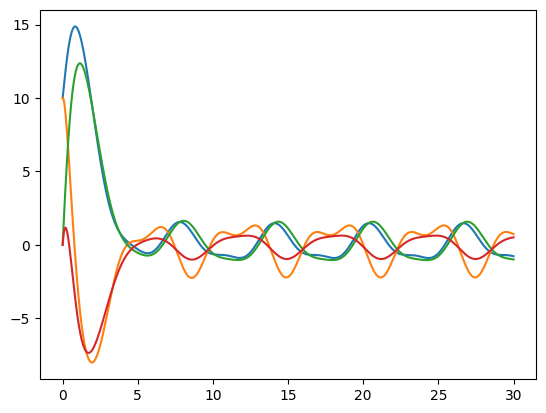

In [278]:
plt.plot(time_1,out.states[0,:])
plt.plot(time_1,out.states[1,:])
plt.plot(time_1,out.states[0,:]-out.states[2,:])
plt.plot(time_1,out.states[1,:]-out.states[3,:])